## 2. 기본 인공신경망 구조
### 2-1. Perceptron


In [19]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


In [35]:
X = [x1, x2] = torch.rand(2)
Y = torch.rand(1)
W = [w1, w2] = torch.rand(2, requires_grad=True)
b = torch.rand(1, requires_grad=True)


### 논리회로
code : PyTorch로 시작하는 딥러닝 입문(https://wikidocs.net/60680)

In [6]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [8]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [9]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [11]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

In [17]:
def Wrong_XOR_gate(x1, x2):
    w1=0.4
    w2=0.67
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [18]:
Wrong_XOR_gate(0, 0), Wrong_XOR_gate(0, 1), Wrong_XOR_gate(1, 0), Wrong_XOR_gate(1, 1)

(0, 1, 0, 1)

XOR 게이트가 출력해야 하는 정답값은 0, 1, 1, 0 이다.  
위의 Wrong_XOR_gate 클래스의 w1, w2, b 값을 아무리 수정하여도 XOR_gate에 맞는 결과를 출력할 수 없음을 알 수 있다.  
즉, XOR 게이트는 Perceptron을 통해 구현할 수 없다.  

### 2-2. Multi Layer Perceptron

In [ ]:
model = nn.Sequential(
    nn.Linear(764, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
    nn.Sigmoid()
)

### 2-3. Fully Connected Layer

In [20]:
fully_connected_layer = nn.Linear(2,1)

In [21]:
fully_connected_layer

Linear(in_features=2, out_features=1, bias=True)

In [24]:
x = torch.rand(1,2)
fully_connected_layer(x)


tensor([[-0.3760]], grad_fn=<AddmmBackward0>)

In [25]:
x

tensor([[0.3859, 0.8813]])

In [30]:
fully_connected_layer.weight

Parameter containing:
tensor([[-0.5913, -0.0125]], requires_grad=True)

In [31]:
fully_connected_layer.bias


Parameter containing:
tensor([-0.1368], requires_grad=True)

### 2-5. Pooling Layer

In [49]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16, 50, 32)
output = m(input)

In [52]:
print(input.shape, output.shape)

torch.Size([20, 16, 50, 32]) torch.Size([20, 16, 24, 15])


code : https://www.tutorialspoint.com/how-to-apply-a-2d-max-pooling-in-pytorch

In [55]:
# Python 3 program to perform 2D Max Pooling on image
# Import the required libraries
import torch
import torchvision
from PIL import Image
import torchvision.transforms as T
import torch.nn.functional as F

# read the input image
img = Image.open('Lenna.png')

# convert the image to torch tensor
img = T.ToTensor()(img)
print("Original size of Image:", img.size()) #Size([3, 466, 700])

# unsqueeze to make 4D
img = img.unsqueeze(0)

# define max pool with square window of size=4, stride=1
pool = torch.nn.MaxPool2d(4, 1)
img = pool(img)
img = img.squeeze(0)
print("Size after MaxPool:",img.size())
img = T.ToPILImage()(img)
img.show()

Original size of Image: torch.Size([3, 512, 512])
Size after MaxPool: torch.Size([3, 509, 509])


In [57]:
# Python 3 program to perform 2D Max Pooling on image
# Import the required libraries
import torch
import torchvision
from PIL import Image
import torchvision.transforms as T
import torch.nn.functional as F

# read the input image
img = Image.open('Lenna.png')

# convert the image to torch tensor
img = T.ToTensor()(img)
print("Original size of Image:", img.size()) #Size([3, 466, 700])

# unsqueeze to make 4D
img = img.unsqueeze(0)

# define max pool with square window of size=4, stride=1
pool = torch.nn.AvgPool2d(4, 1)
img = pool(img)
img = img.squeeze(0)
print("Size after AvgPool:",img.size())
img = T.ToPILImage()(img)
img.show()

Original size of Image: torch.Size([3, 512, 512])
Size after AvgPool: torch.Size([3, 509, 509])


## 3. 모델 학습 요소

### 3.1 손실 함수 (Loss function)

code : https://neptune.ai/blog/pytorch-loss-functions

In [61]:
import torch
import torch.nn as nn

input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
mse_loss = nn.MSELoss()
output = mse_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[-0.1457, -0.1122,  2.3264,  0.6388, -0.6341],
        [-2.1247, -1.5294,  0.3026,  1.7853,  0.2048],
        [-0.0038,  0.0500,  0.3233,  0.2413,  0.2530]], requires_grad=True)
target:  tensor([[ 0.8480, -1.3358, -0.5295,  1.5153, -0.2858],
        [ 1.2105,  0.5459, -0.5948,  0.6668,  0.9814],
        [ 0.6543,  0.8082,  2.0178,  0.3404,  1.0369]])
output:  tensor(2.2749, grad_fn=<MseLossBackward0>)


In [62]:
import torch
import torch.nn as nn

input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

cross_entropy_loss = nn.CrossEntropyLoss()
output = cross_entropy_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.2633, -0.5075,  1.3920, -0.9615, -0.3498],
        [ 0.9773,  0.4962,  1.1331,  0.3257, -0.8880],
        [-1.2524, -0.7455,  0.0787, -1.6435, -1.2173]], requires_grad=True)
target:  tensor([1, 0, 0])
output:  tensor(1.9321, grad_fn=<NllLossBackward0>)


### 3.3 활성화 함수 (Activation function)
code : https://machinelearningmastery.com/activation-functions-in-pytorch/

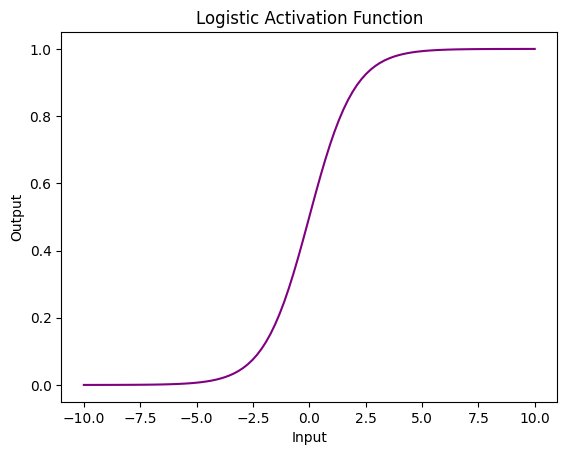

In [58]:
# importing the libraries
import torch
import matplotlib.pyplot as plt
 
# create a PyTorch tensor
x = torch.linspace(-10, 10, 100)
 
# apply the logistic activation function to the tensor
y = torch.sigmoid(x)
 
# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='purple')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Logistic Activation Function')
plt.show()

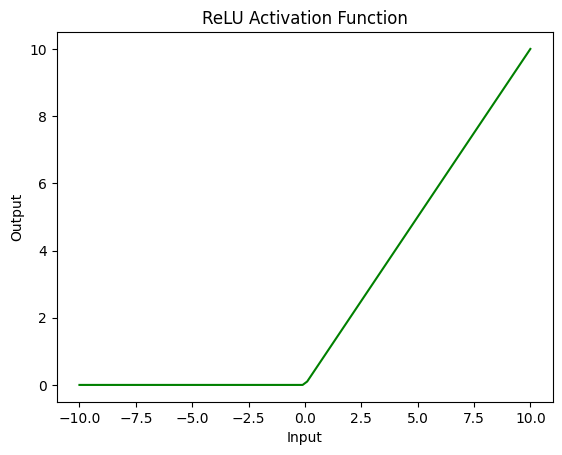

In [59]:
# apply the ReLU activation function to the tensor
y = torch.relu(x)
 
# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='green')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.show()

### 3.4 데이터셋 분할
code : https://pozalabs.github.io/Dataset_Splitting/

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
x_data = np.array([
    [2, 1, 4, 2],
    [3, 2, 15, 1],
    [3, 4, 7, 11],
    [5, 15, 8, 5],
    [7, 5, 2, 9],
    [2, 5, 1, 8],
    [8, 9, 3, 6],
    [9, 10, 6, 8],
    [6, 12, 13, 1],
    [9, 2, 18, 32],
    [6, 10, 12, 2],
    [2, 4, 7, 15],
    [15, 6, 2, 7],
    [16, 2, 6, 1],
    [10, 8, 2, 6],
    [13, 12, 11, 2],
    [5, 9, 1, 12],
    [16, 18, 3, 15],
    [12, 1, 8, 3],
    [6, 2, 9, 16]
])
y_data = np.array([3, 5, 7, 10, 12, 7, 13, 13, 12, 13, 12, 6, 13, 6, 6, 2, 17, 12, 2, 9])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=777)

In [41]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, shuffle=True, random_state=777)

In [43]:
print(f"all datasets: {len(x_data)}, train: {len(x_train)}, validataion: {len(x_val)}, test: {len(x_test)}")

all datasets: 20, train: 12, validataion: 4, test: 4
